In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\shari\\OneDrive\\Desktop\\Shahram_Space X'

In [3]:
df= pd.read_csv('dataset_falcon9.csv')

In [4]:
df.info()
#df_num=FlightNumber,PayloadMass

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     int64  
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [5]:
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,6/4/2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,5/22/2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,3/1/2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
3,4,9/29/2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
4,5,12/3/2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0


In [6]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64

In [7]:
df['Class'].value_counts()

1    60
0    30
Name: Class, dtype: int64

In [8]:
df_success= df[df['Class']==1]

In [9]:
df_fail= df[df['Class']!=1]

In [10]:
df_success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 6 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    60 non-null     int64  
 1   Date            60 non-null     object 
 2   BoosterVersion  60 non-null     object 
 3   PayloadMass     60 non-null     float64
 4   Orbit           60 non-null     object 
 5   LaunchSite      60 non-null     object 
 6   Outcome         60 non-null     object 
 7   Flights         60 non-null     int64  
 8   GridFins        60 non-null     bool   
 9   Reused          60 non-null     bool   
 10  Legs            60 non-null     bool   
 11  LandingPad      55 non-null     object 
 12  Block           60 non-null     int64  
 13  ReusedCount     60 non-null     int64  
 14  Serial          60 non-null     object 
 15  Longitude       60 non-null     float64
 16  Latitude        60 non-null     float64
 17  Class           60 non-null     int64

## just for seeing correlation code, it is not usable here

C:\Users\shari\AppData\Local\Temp\ipykernel_31528\2228464707.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=colors, center=0)


<Axes: >

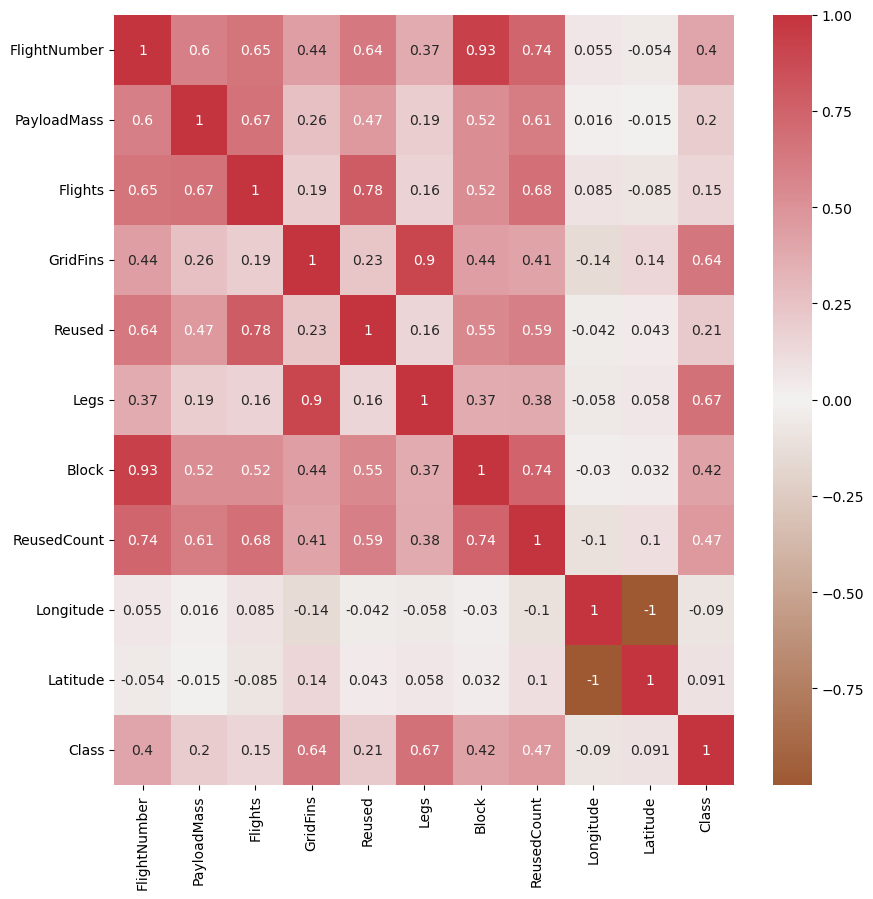

In [11]:
colors = sns.diverging_palette(30, 10, l=45, center="light", as_cmap=True)

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap=colors, center=0)

In [12]:
df_num = df.select_dtypes(include=['int64', 'float64'])

In [13]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Flights       90 non-null     int64  
 3   Block         90 non-null     int64  
 4   ReusedCount   90 non-null     int64  
 5   Longitude     90 non-null     float64
 6   Latitude      90 non-null     float64
 7   Class         90 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 5.8 KB


In [14]:
df_num['FlightNumber'].value_counts()

1     1
68    1
66    1
65    1
64    1
     ..
29    1
28    1
27    1
26    1
90    1
Name: FlightNumber, Length: 90, dtype: int64

In [15]:
df_num['Block'].value_counts()

5    39
1    19
3    15
4    11
2     6
Name: Block, dtype: int64

In [16]:
df_num['Flights'].value_counts()

1    53
2    19
3     8
4     6
5     2
6     2
Name: Flights, dtype: int64

In [17]:
df_num['Latitude'].value_counts()

28.561857    55
28.608058    22
34.632093    13
Name: Latitude, dtype: int64

In [18]:
df_num['Longitude'].value_counts()

-80.577366     55
-80.603956     22
-120.610829    13
Name: Longitude, dtype: int64

In [19]:
df_num.drop(['Latitude'], axis=1,inplace=True)

In [20]:
df_num.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Class
0,1,6104.959412,1,1,0,-80.577366,0
1,2,525.000000,1,1,0,-80.577366,0
2,3,677.000000,1,1,0,-80.577366,0
3,4,500.000000,1,1,0,-120.610829,0
4,5,3170.000000,1,1,0,-80.577366,0


In [21]:
df_num['PayloadMass'].value_counts()

15400.000000    10
9600.000000      7
6104.959412      5
15600.000000     3
4230.000000      1
                ..
6070.000000      1
2708.000000      1
3669.000000      1
6761.000000      1
3681.000000      1
Name: PayloadMass, Length: 69, dtype: int64

In [22]:
df_num['ReusedCount'].value_counts()

0    30
1    24
3    12
5    11
2     9
4     4
Name: ReusedCount, dtype: int64

In [23]:
df_num['Class'].value_counts()

1    60
0    30
Name: Class, dtype: int64

In [24]:
df_num.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Class
0,1,6104.959412,1,1,0,-80.577366,0
1,2,525.000000,1,1,0,-80.577366,0
2,3,677.000000,1,1,0,-80.577366,0
3,4,500.000000,1,1,0,-120.610829,0
4,5,3170.000000,1,1,0,-80.577366,0


array([[<Axes: title={'center': 'FlightNumber'}>,
        <Axes: title={'center': 'PayloadMass'}>,
        <Axes: title={'center': 'Flights'}>],
       [<Axes: title={'center': 'Block'}>,
        <Axes: title={'center': 'ReusedCount'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >, <Axes: >]],
      dtype=object)

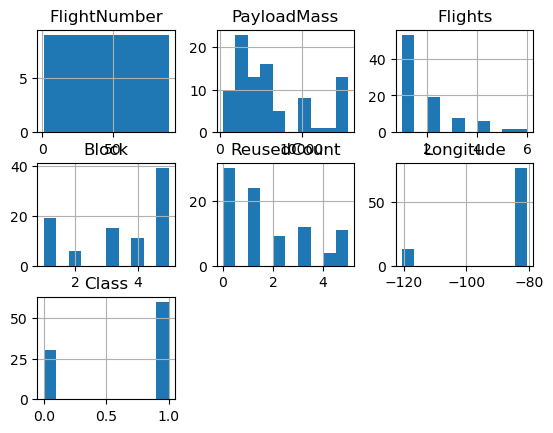

In [25]:
df_num.hist()

In [26]:
df_num.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Longitude', 'Class'],
      dtype='object')

## check how to normalize it, is this normal????

In [27]:
df_num['Class']

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: Class, Length: 90, dtype: int64

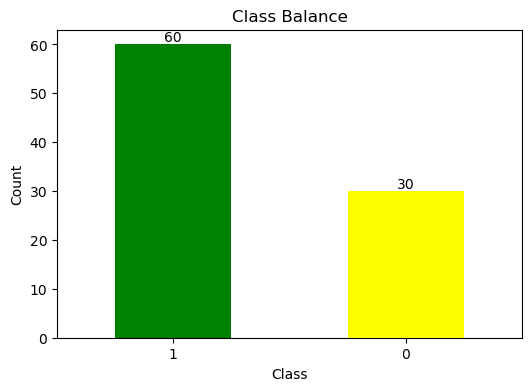

In [28]:
class_balance = df_num["Class"].value_counts()

# Plot the class balance as a bar chart
plt.figure(figsize=(6, 4))
class_balance.plot(kind='bar', color=['green', 'yellow'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance")
plt.xticks(rotation=0)

# Annotate the bars with their counts
for i, v in enumerate(class_balance):
    plt.text(i, v, str(v), ha='center', va='bottom')

# This is unblanced data
## For this purpose over sampling process has been done 

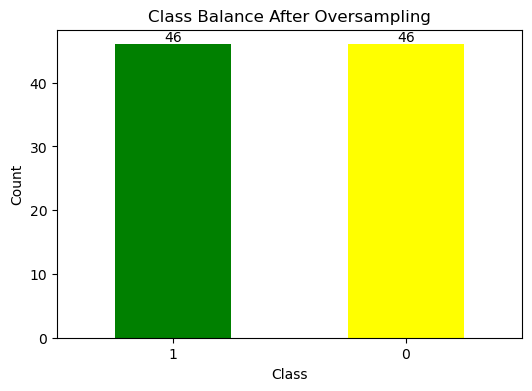

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Splitting the data into features and target
X = df_num.drop(columns=['Class'])
y = df_num['Class']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Count the class balance after oversampling
class_balance_resampled = pd.Series(y_train_resampled).value_counts()

# Plot the class balance after oversampling
plt.figure(figsize=(6, 4))
class_balance_resampled.plot(kind='bar', color=['green', 'yellow'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance After Oversampling")
plt.xticks(rotation=0)

# Annotate the bars with their counts
for i, v in enumerate(class_balance_resampled):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


## Doing standardization for whole df_num (but it was not done for Class

In [30]:
from sklearn.preprocessing import StandardScaler

# List of columns to exclude from standardization
exclude_columns = ['Class']

# Filter out the columns for standardization
columns_to_standardize = [col for col in df_num.columns if col not in exclude_columns]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
df_num[columns_to_standardize] = scaler.fit_transform(df_num[columns_to_standardize])


In [31]:
df_num[columns_to_standardize]

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude
0,-1.712912,4.759999e-11,-0.653913,-1.575895,-0.973440,0.411430
1,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.973440,0.411430
2,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.973440,0.411430
3,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.973440,-2.433736
4,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.973440,0.411430
...,...,...,...,...,...,...
85,1.558942,1.991005e+00,0.174991,0.945537,0.202528,0.409541
86,1.597434,1.991005e+00,1.003894,0.945537,0.202528,0.409541
87,1.635927,1.991005e+00,3.490605,0.945537,1.966480,0.409541
88,1.674419,1.991005e+00,1.003894,0.945537,0.202528,0.411430


In [32]:
# Concatenate the standardized numerical columns with the 'Class' column
df_num_standardized = pd.concat([df_num[columns_to_standardize], df_num['Class']], axis=1)


In [33]:
df_num_standardized

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Class
0,-1.712912,4.759999e-11,-0.653913,-1.575895,-0.973440,0.411430,0
1,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.973440,0.411430,0
2,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.973440,0.411430,0
3,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.973440,-2.433736,0
4,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.973440,0.411430,0
...,...,...,...,...,...,...,...
85,1.558942,1.991005e+00,0.174991,0.945537,0.202528,0.409541,1
86,1.597434,1.991005e+00,1.003894,0.945537,0.202528,0.409541,1
87,1.635927,1.991005e+00,3.490605,0.945537,1.966480,0.409541,1
88,1.674419,1.991005e+00,1.003894,0.945537,0.202528,0.411430,1


# Here string was seperated from the df_num

In [34]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     int64  
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [35]:
df_string=df[['Date','BoosterVersion','Orbit','LaunchSite','Outcome','GridFins','Reused','Legs', 'LandingPad','Serial']]

In [36]:
df_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            90 non-null     object
 1   BoosterVersion  90 non-null     object
 2   Orbit           90 non-null     object
 3   LaunchSite      90 non-null     object
 4   Outcome         90 non-null     object
 5   GridFins        90 non-null     bool  
 6   Reused          90 non-null     bool  
 7   Legs            90 non-null     bool  
 8   LandingPad      64 non-null     object
 9   Serial          90 non-null     object
dtypes: bool(3), object(7)
memory usage: 5.3+ KB


In [37]:
df_string.columns

Index(['Date', 'BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome', 'GridFins',
       'Reused', 'Legs', 'LandingPad', 'Serial'],
      dtype='object')

In [38]:
df_string['BoosterVersion'].value_counts()

Falcon 9    90
Name: BoosterVersion, dtype: int64

In [39]:
df_string.drop(columns=['BoosterVersion'], axis=1, inplace=True)
df_string

C:\Users\shari\AppData\Local\Temp\ipykernel_31528\3157683716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_string.drop(columns=['BoosterVersion'], axis=1, inplace=True)


,Date,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial
0,6/4/2010,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0003
1,5/22/2012,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0005
2,3/1/2013,ISS,CCAFS SLC 40,None None,False,False,False,NaN,B0007
3,9/29/2013,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN,B1003
4,12/3/2013,GTO,CCAFS SLC 40,None None,False,False,False,NaN,B1004
...,...,...,...,...,...,...,...,...,...
85,9/3/2020,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1060
86,10/6/2020,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1058
87,10/18/2020,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1051
88,10/24/2020,VLEO,CCAFS SLC 40,True ASDS,True,True,True,5e9e3033383ecbb9e534e7cc,B1060


# Date need to be changed to the Integer values (need to be droped we do not need it)

# df_string['Date'].value_counts()

# Convert 'Date' column to datetime format
df_string['Date'] = pd.to_datetime(df_string['Date'], format='%m/%d/%Y')

# Convert datetime values to Unix timestamp format (seconds since 1970-01-01)
df_string['Date'] = (df_string['Date'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')

# Display the updated DataFrame
print(df_string['Date'].value_counts())



In [40]:
df_string

,Date,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial
0,6/4/2010,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0003
1,5/22/2012,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0005
2,3/1/2013,ISS,CCAFS SLC 40,None None,False,False,False,NaN,B0007
3,9/29/2013,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN,B1003
4,12/3/2013,GTO,CCAFS SLC 40,None None,False,False,False,NaN,B1004
...,...,...,...,...,...,...,...,...,...
85,9/3/2020,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1060
86,10/6/2020,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1058
87,10/18/2020,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1051
88,10/24/2020,VLEO,CCAFS SLC 40,True ASDS,True,True,True,5e9e3033383ecbb9e534e7cc,B1060


In [41]:
# Drop the 'Date' column from df_string
df_string.drop(columns=['Date'], axis=1, inplace=True)
df_string


C:\Users\shari\AppData\Local\Temp\ipykernel_31528\2382011314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_string.drop(columns=['Date'], axis=1, inplace=True)


,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial
0,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0003
1,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0005
2,ISS,CCAFS SLC 40,None None,False,False,False,NaN,B0007
3,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN,B1003
4,GTO,CCAFS SLC 40,None None,False,False,False,NaN,B1004
...,...,...,...,...,...,...,...,...
85,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1060
86,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1058
87,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1051
88,VLEO,CCAFS SLC 40,True ASDS,True,True,True,5e9e3033383ecbb9e534e7cc,B1060


In [42]:
df_string['GridFins'].value_counts()

True     70
False    20
Name: GridFins, dtype: int64

In [43]:
df_string['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

In [44]:
df_string['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [45]:
df_string['Legs'].value_counts()   #bolean

True     71
False    19
Name: Legs, dtype: int64

In [46]:
df_string['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [47]:
df_string['Outcome'].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [48]:
df_string['Reused'].value_counts()

False    53
True     37
Name: Reused, dtype: int64

In [49]:
df_string['Serial'].value_counts()

B1049    6
B1051    5
B1059    4
B1056    4
B1048    4
B1046    4
B1060    3
B1058    3
B1047    3
B1031    2
B1036    2
B1021    2
B1039    2
B1035    2
B1041    2
B1029    2
B1040    2
B1045    2
B1032    2
B1042    1
B1043    1
B1038    1
B1044    1
B1037    1
B1050    1
B1054    1
B1034    1
B0003    1
B1030    1
B1013    1
B0007    1
B1003    1
B1004    1
B1005    1
B1006    1
B1007    1
B1008    1
B1011    1
B1010    1
B1012    1
B1015    1
B0005    1
B1016    1
B1018    1
B1019    1
B1017    1
B1020    1
B1022    1
B1023    1
B1025    1
B1026    1
B1028    1
B1062    1
Name: Serial, dtype: int64

In [50]:
df_string.drop(['Serial'], axis=1, inplace=True)
df_string

C:\Users\shari\AppData\Local\Temp\ipykernel_31528\2819143009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_string.drop(['Serial'], axis=1, inplace=True)


,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad
0,LEO,CCAFS SLC 40,None None,False,False,False,NaN
1,LEO,CCAFS SLC 40,None None,False,False,False,NaN
2,ISS,CCAFS SLC 40,None None,False,False,False,NaN
3,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN
4,GTO,CCAFS SLC 40,None None,False,False,False,NaN
...,...,...,...,...,...,...,...
85,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca
86,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca
87,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca
88,VLEO,CCAFS SLC 40,True ASDS,True,True,True,5e9e3033383ecbb9e534e7cc


# Change the boolean to integer

In [51]:
df_string['Legs'] = df_string['Legs'].astype(int)
df_string['Reused'] = df_string['Reused'].astype(int)
df_string['GridFins'] = df_string['GridFins'].astype(int)



C:\Users\shari\AppData\Local\Temp\ipykernel_31528\2612552314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_string['Legs'] = df_string['Legs'].astype(int)
C:\Users\shari\AppData\Local\Temp\ipykernel_31528\2612552314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_string['Reused'] = df_string['Reused'].astype(int)
C:\Users\shari\AppData\Local\Temp\ipykernel_31528\2612552314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [52]:
df_string

,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad
0,LEO,CCAFS SLC 40,None None,0,0,0,NaN
1,LEO,CCAFS SLC 40,None None,0,0,0,NaN
2,ISS,CCAFS SLC 40,None None,0,0,0,NaN
3,PO,VAFB SLC 4E,False Ocean,0,0,0,NaN
4,GTO,CCAFS SLC 40,None None,0,0,0,NaN
...,...,...,...,...,...,...,...
85,VLEO,KSC LC 39A,True ASDS,1,1,1,5e9e3032383ecb6bb234e7ca
86,VLEO,KSC LC 39A,True ASDS,1,1,1,5e9e3032383ecb6bb234e7ca
87,VLEO,KSC LC 39A,True ASDS,1,1,1,5e9e3032383ecb6bb234e7ca
88,VLEO,CCAFS SLC 40,True ASDS,1,1,1,5e9e3033383ecbb9e534e7cc


In [53]:
df_string['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

In [54]:
df_landingpad=df_string[df_string['LandingPad']=='5e9e3032383ecb6bb234e7ca']
set(df_landingpad['Orbit'])

{'GTO', 'HEO', 'ISS', 'MEO', 'VLEO'}

In [55]:
df_string[['LandingPad','Orbit']]

,LandingPad,Orbit
0,NaN,LEO
1,NaN,LEO
2,NaN,ISS
3,NaN,PO
4,NaN,GTO
...,...,...
85,5e9e3032383ecb6bb234e7ca,VLEO
86,5e9e3032383ecb6bb234e7ca,VLEO
87,5e9e3032383ecb6bb234e7ca,VLEO
88,5e9e3033383ecbb9e534e7cc,VLEO


In [56]:
df_string.head()

,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad
0,LEO,CCAFS SLC 40,None None,0,0,0,NaN
1,LEO,CCAFS SLC 40,None None,0,0,0,NaN
2,ISS,CCAFS SLC 40,None None,0,0,0,NaN
3,PO,VAFB SLC 4E,False Ocean,0,0,0,NaN
4,GTO,CCAFS SLC 40,None None,0,0,0,NaN


In [57]:
#df_string.columns

In [58]:
# 'LandingPad', 'Latitude', 'LaunchSite', , 'Orbit','Outcome',

In [62]:
# Loop through each column and count unique values
for column in df_string.columns:
    counts = df_string[column].value_counts()
    print(f"Column: {column}\n{counts}\n")


Column: GridFins
1    70
0    20
Name: GridFins, dtype: int64

Column: Reused
0    53
1    37
Name: Reused, dtype: int64

Column: Legs
1    71
0    19
Name: Legs, dtype: int64

Column: LandingPad_0
0    77
1    13
Name: LandingPad_0, dtype: int64

Column: LandingPad_1
0    88
1     2
Name: LandingPad_1, dtype: int64

Column: LandingPad_2
0    55
1    35
Name: LandingPad_2, dtype: int64

Column: LandingPad_3
0    88
1     2
Name: LandingPad_3, dtype: int64

Column: LandingPad_4
0    78
1    12
Name: LandingPad_4, dtype: int64

Column: LandingPad_5
0    64
1    26
Name: LandingPad_5, dtype: int64

Column: LaunchSite_CCAFS SLC 40
1    55
0    35
Name: LaunchSite_CCAFS SLC 40, dtype: int64

Column: LaunchSite_KSC LC 39A
0    68
1    22
Name: LaunchSite_KSC LC 39A, dtype: int64

Column: LaunchSite_VAFB SLC 4E
0    77
1    13
Name: LaunchSite_VAFB SLC 4E, dtype: int64

Column: Orbit_ES-L1
0    89
1     1
Name: Orbit_ES-L1, dtype: int64

Column: Orbit_GEO
0    89
1     1
Name: Orbit_GEO, dtyp

In [80]:
# Concatenate df_string and df_num
df_preprocessed = pd.concat([df_string, df_num], axis=1)

# Display the concatenated DataFrame
df_preprocessed


,GridFins,Reused,Legs,LandingPad_0,LandingPad_1,LandingPad_2,LandingPad_3,LandingPad_4,LandingPad_5,LaunchSite_CCAFS SLC 40,...,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Class
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,-1.712912,4.759999e-11,-0.653913,-1.575895,-0.973440,0.411430,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.973440,0.411430,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.973440,0.411430,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.973440,-2.433736,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.973440,0.411430,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1,1,1,0,0,1,0,0,0,0,...,1,0,0,1.558942,1.991005e+00,0.174991,0.945537,0.202528,0.409541,1
86,1,1,1,0,0,1,0,0,0,0,...,1,0,0,1.597434,1.991005e+00,1.003894,0.945537,0.202528,0.409541,1
87,1,1,1,0,0,1,0,0,0,0,...,1,0,0,1.635927,1.991005e+00,3.490605,0.945537,1.966480,0.409541,1
88,1,1,1,0,0,0,0,1,0,1,...,1,0,0,1.674419,1.991005e+00,1.003894,0.945537,0.202528,0.411430,1


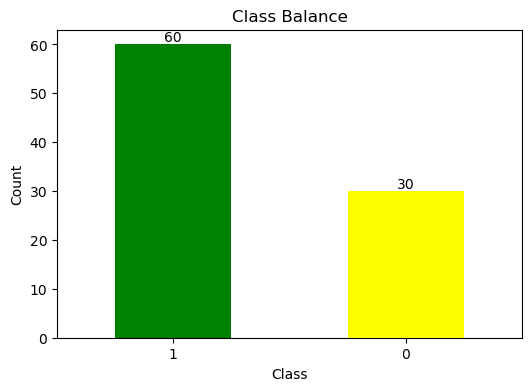

In [81]:
class_balance = df_preprocessed["Class"].value_counts()

# Plot the class balance as a bar chart
plt.figure(figsize=(6, 4))
class_balance.plot(kind='bar', color=['green', 'yellow'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance")
plt.xticks(rotation=0)

# Annotate the bars with their counts
for i, v in enumerate(class_balance):
    plt.text(i, v, str(v), ha='center', va='bottom')

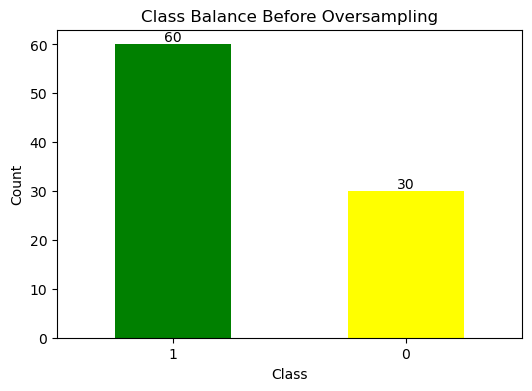

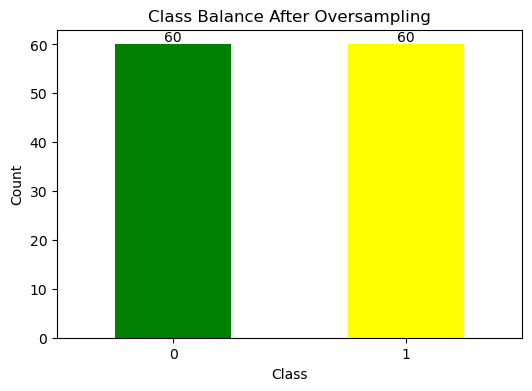

In [82]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Assuming df_preprocessed is your concatenated and preprocessed DataFrame

# Get the class balance before oversampling
class_balance_before = df_preprocessed['Class'].value_counts()

# Plot the class balance before oversampling
plt.figure(figsize=(6, 4))
class_balance_before.plot(kind='bar', color=['green', 'yellow'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance Before Oversampling")
plt.xticks(rotation=0)

# Annotate the bars with their counts
for i, v in enumerate(class_balance_before):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Apply SMOTE oversampling to the 'Class' column
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_preprocessed.drop(columns=['Class']), df_preprocessed['Class'])

# Count the class balance after oversampling
class_balance_after = pd.Series(y_resampled).value_counts()

# Plot the class balance after oversampling
plt.figure(figsize=(6, 4))
class_balance_after.plot(kind='bar', color=['green', 'yellow'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance After Oversampling")
plt.xticks(rotation=0)

# Annotate the bars with their counts
for i, v in enumerate(class_balance_after):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


In [83]:
df_preprocessed

,GridFins,Reused,Legs,LandingPad_0,LandingPad_1,LandingPad_2,LandingPad_3,LandingPad_4,LandingPad_5,LaunchSite_CCAFS SLC 40,...,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Class
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,-1.712912,4.759999e-11,-0.653913,-1.575895,-0.973440,0.411430,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.973440,0.411430,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.973440,0.411430,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.973440,-2.433736,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.973440,0.411430,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1,1,1,0,0,1,0,0,0,0,...,1,0,0,1.558942,1.991005e+00,0.174991,0.945537,0.202528,0.409541,1
86,1,1,1,0,0,1,0,0,0,0,...,1,0,0,1.597434,1.991005e+00,1.003894,0.945537,0.202528,0.409541,1
87,1,1,1,0,0,1,0,0,0,0,...,1,0,0,1.635927,1.991005e+00,3.490605,0.945537,1.966480,0.409541,1
88,1,1,1,0,0,0,0,1,0,1,...,1,0,0,1.674419,1.991005e+00,1.003894,0.945537,0.202528,0.411430,1


In [84]:
df_preprocessed['Class'].value_counts()

1    60
0    30
Name: Class, dtype: int64

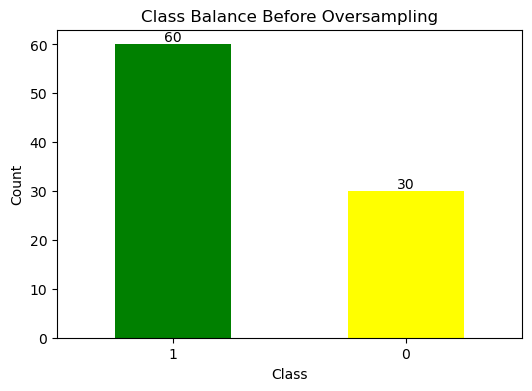

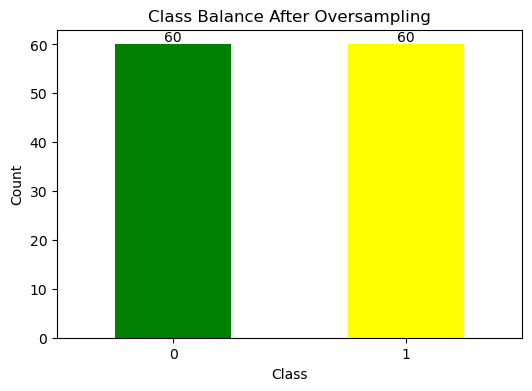

     GridFins  Reused  Legs  LandingPad_0  LandingPad_1  LandingPad_2  \
0           0       0     0             0             0             0   
1           0       0     0             0             0             0   
2           0       0     0             0             0             0   
3           0       0     0             0             0             0   
4           0       0     0             0             0             0   
..        ...     ...   ...           ...           ...           ...   
115         0       0     0             0             0             0   
116         0       0     0             0             0             0   
117         1       0     1             0             0             0   
118         1       0     1             0             0             0   
119         0       0     0             0             0             0   

     LandingPad_3  LandingPad_4  LandingPad_5  LaunchSite_CCAFS SLC 40  ...  \
0               0             0             

In [85]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Assuming df_preprocessed is your concatenated and preprocessed DataFrame

# Get the class balance before oversampling
class_balance_before = df_preprocessed['Class'].value_counts()

# Plot the class balance before oversampling
plt.figure(figsize=(6, 4))
class_balance_before.plot(kind='bar', color=['green', 'yellow'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance Before Oversampling")
plt.xticks(rotation=0)

# Annotate the bars with their counts
for i, v in enumerate(class_balance_before):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Apply SMOTE oversampling to the 'Class' column
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_preprocessed.drop(columns=['Class']), df_preprocessed['Class'])

# Create a new DataFrame with the oversampled data
df_preprocessed_oversampled = pd.DataFrame(X_resampled, columns=df_preprocessed.drop(columns=['Class']).columns)
df_preprocessed_oversampled['Class'] = y_resampled

# Get the class balance after oversampling
class_balance_after = df_preprocessed_oversampled['Class'].value_counts()

# Plot the class balance after oversampling
plt.figure(figsize=(6, 4))
class_balance_after.plot(kind='bar', color=['green', 'yellow'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance After Oversampling")
plt.xticks(rotation=0)

# Annotate the bars with their counts
for i, v in enumerate(class_balance_after):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Display the oversampled DataFrame
print(df_preprocessed_oversampled)


In [86]:
df_preprocessed['Class'].value_counts()

1    60
0    30
Name: Class, dtype: int64

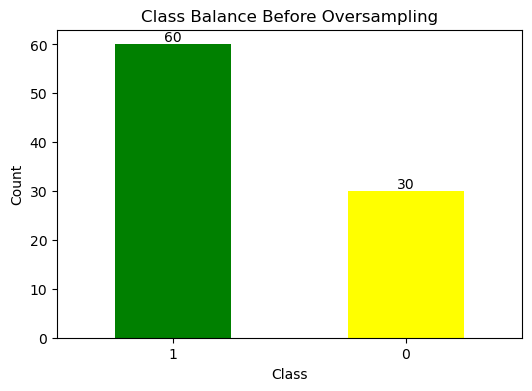

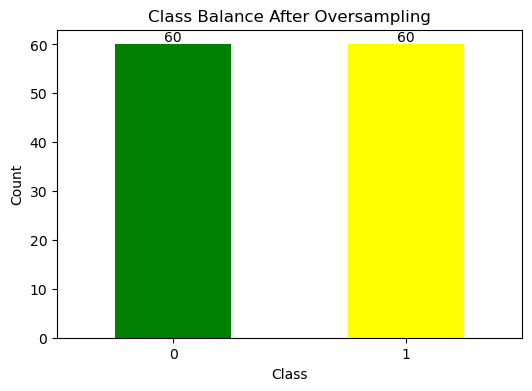

     GridFins  Reused  Legs  LandingPad_0  LandingPad_1  LandingPad_2  \
0           0       0     0             0             0             0   
1           0       0     0             0             0             0   
2           0       0     0             0             0             0   
3           0       0     0             0             0             0   
4           0       0     0             0             0             0   
..        ...     ...   ...           ...           ...           ...   
115         0       0     0             0             0             0   
116         0       0     0             0             0             0   
117         1       0     1             0             0             0   
118         1       0     1             0             0             0   
119         0       0     0             0             0             0   

     LandingPad_3  LandingPad_4  LandingPad_5  LaunchSite_CCAFS SLC 40  ...  \
0               0             0             

In [87]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Assuming df_preprocessed is your concatenated and preprocessed DataFrame

# Get the class balance before oversampling
class_balance_before = df_preprocessed['Class'].value_counts()

# Plot the class balance before oversampling
plt.figure(figsize=(6, 4))
class_balance_before.plot(kind='bar', color=['green', 'yellow'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance Before Oversampling")
plt.xticks(rotation=0)

# Annotate the bars with their counts
for i, v in enumerate(class_balance_before):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Apply SMOTE oversampling to the 'Class' column
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_preprocessed.drop(columns=['Class']), df_preprocessed['Class'])

# Create a new DataFrame with the oversampled data
df_preprocessed_oversampled = pd.DataFrame(X_resampled, columns=df_preprocessed.drop(columns=['Class']).columns)
df_preprocessed_oversampled['Class'] = y_resampled

# Get the class balance after oversampling
class_balance_after = df_preprocessed_oversampled['Class'].value_counts()

# Plot the class balance after oversampling
plt.figure(figsize=(6, 4))
class_balance_after.plot(kind='bar', color=['green', 'yellow'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance After Oversampling")
plt.xticks(rotation=0)

# Annotate the bars with their counts
for i, v in enumerate(class_balance_after):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Display the oversampled DataFrame
print(df_preprocessed_oversampled)


In [88]:
df_preprocessed_oversampled.head()

,GridFins,Reused,Legs,LandingPad_0,LandingPad_1,LandingPad_2,LandingPad_3,LandingPad_4,LandingPad_5,LaunchSite_CCAFS SLC 40,...,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Class
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,-1.712912,4.759999e-11,-0.653913,-1.575895,-0.97344,0.411430,0
1,0,0,0,0,0,0,0,0,1,1,...,0,0,0,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.97344,0.411430,0
2,0,0,0,0,0,0,0,0,1,1,...,0,0,0,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.97344,0.411430,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.97344,-2.433736,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.97344,0.411430,0


In [89]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming df_preprocessed is your concatenated and preprocessed DataFrame

# Get the features (X) and target variable (y)
X = df_preprocessed.drop(columns=['Class'])
y = df_preprocessed['Class']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling on the 'Class' column
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the oversampled data
df_preprocessed_oversampled = pd.DataFrame(X_resampled, columns=X.columns)
df_preprocessed_oversampled['Class'] = y_resampled

# Display the class balance after oversampling
print(df_preprocessed_oversampled['Class'].value_counts())


0    60
1    60
Name: Class, dtype: int64


In [90]:
df_preprocessed_oversampled['Class'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
115    0
116    0
117    0
118    0
119    0
Name: Class, Length: 120, dtype: int64>

In [91]:
df.to_csv('df_preprocessed_oversampled')

C:\Users\shari\AppData\Local\Temp\ipykernel_31528\4059793694.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=colors, center=0)


<Axes: >

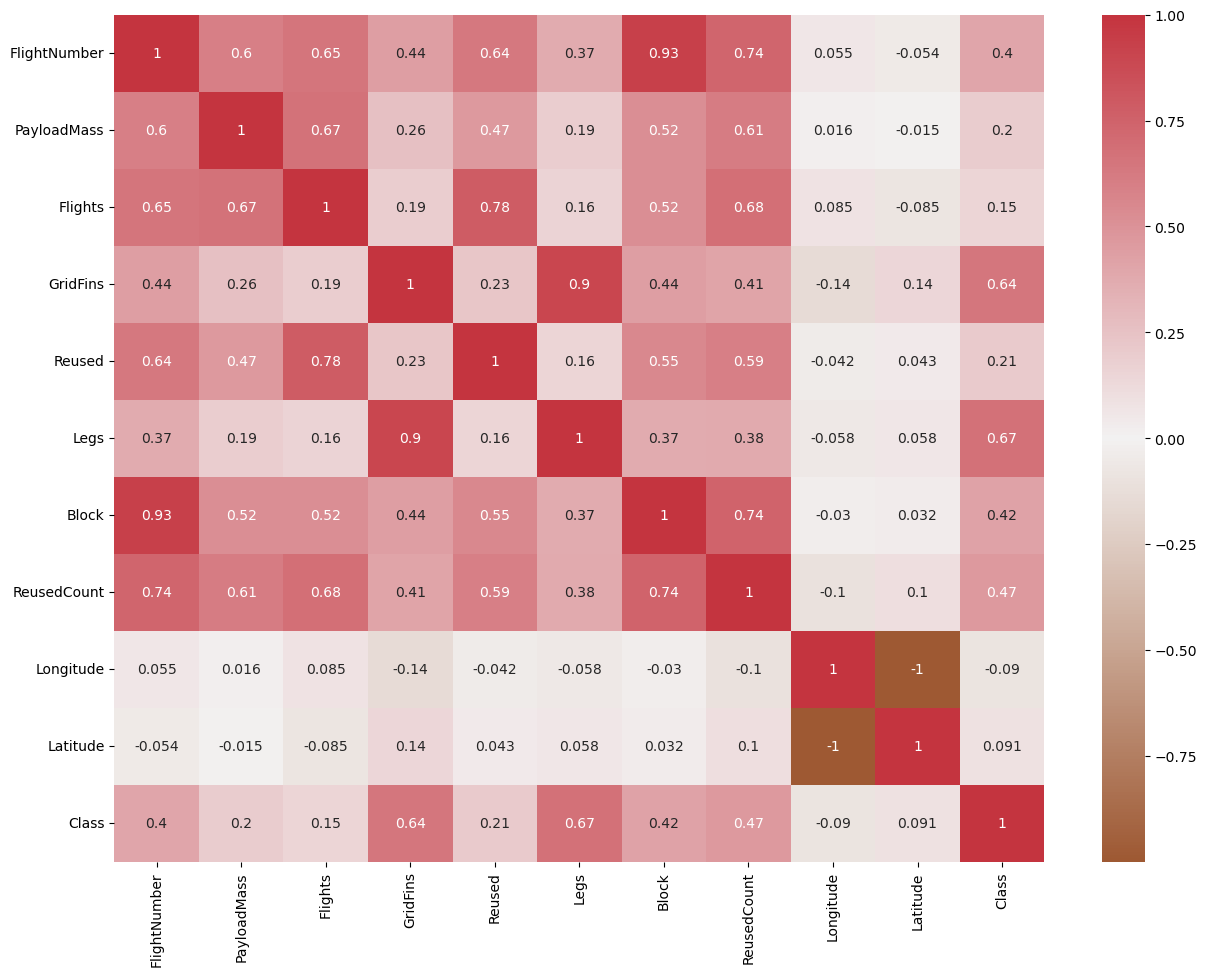

In [92]:
colors = sns.diverging_palette(30, 10, l=45, center="light", as_cmap=True)

plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(), annot=True, cmap=colors, center=0)

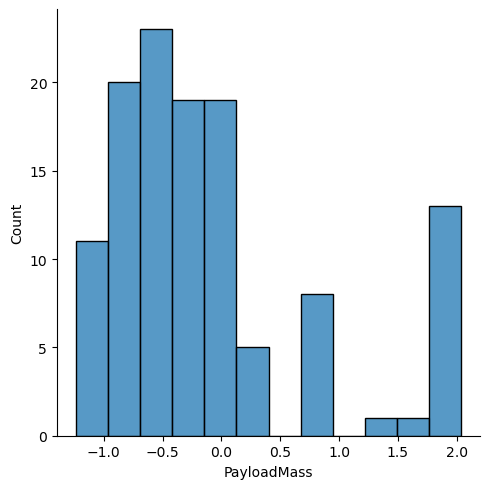

In [93]:
sns.displot(df_preprocessed_oversampled['PayloadMass'])

<Axes: xlabel='LaunchSite', ylabel='count'>

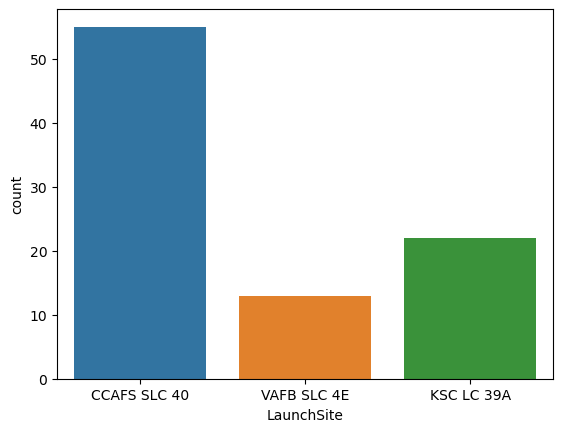

In [94]:
sns.countplot(x='LaunchSite', data=df)

In [95]:
df_preprocessed_oversampled.to_csv('df_preprocessed_oversampled')

In [96]:
df_preprocessed_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GridFins                 120 non-null    int32  
 1   Reused                   120 non-null    int32  
 2   Legs                     120 non-null    int32  
 3   LandingPad_0             120 non-null    uint8  
 4   LandingPad_1             120 non-null    uint8  
 5   LandingPad_2             120 non-null    uint8  
 6   LandingPad_3             120 non-null    uint8  
 7   LandingPad_4             120 non-null    uint8  
 8   LandingPad_5             120 non-null    uint8  
 9   LaunchSite_CCAFS SLC 40  120 non-null    uint8  
 10  LaunchSite_KSC LC 39A    120 non-null    uint8  
 11  LaunchSite_VAFB SLC 4E   120 non-null    uint8  
 12  Orbit_ES-L1              120 non-null    uint8  
 13  Orbit_GEO                120 non-null    uint8  
 14  Orbit_GTO                1